<a href="https://colab.research.google.com/github/vallimeenaa9/Breast_Cancer/blob/main/Ensemble_VGG16%2BResNet50%2BInception%2BXception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install torchvision

In [ ]:
import zipfile
import os
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Cancer_PNG.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from keras.models import Sequential,Model
from keras.applications.vgg16 import preprocess_input,VGG16
from keras.layers import MaxPooling2D,Conv2D,Dense,BatchNormalization,Dropout,GlobalAveragePooling2D,Flatten,Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
from keras.utils.vis_utils import plot_model
import ipywidgets as widgets
from sklearn.preprocessing import OneHotEncoder
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
from glob import glob
from tifffile import imread, imwrite
from skimage.transform import resize

In [ ]:
len(os.listdir('/tmp/Cancer_PNG/'))

4

In [ ]:
# Prepere data
benign = os.listdir('/tmp/Cancer_PNG/Benign')
insitu  = os.listdir('/tmp/Cancer_PNG/InSitu')
invasive  = os.listdir('/tmp/Cancer_PNG/Invasive')
normal  = os.listdir('/tmp/Cancer_PNG/Normal')



In [ ]:
# Prepere input data
X_data =[]
for file in benign:
    img = cv2.imread('/tmp/Cancer_PNG/Benign/'+file)
    face = cv2.resize(img, (224, 224) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

for file in insitu:
    img = cv2.imread('/tmp/Cancer_PNG/InSitu/'+file)
    face = cv2.resize(img, (224, 224) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)
  
for file in invasive:
    img = cv2.imread('/tmp/Cancer_PNG/Invasive/'+file)
    face = cv2.resize(img, (224, 224) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

for file in normal:
    img = cv2.imread('/tmp/Cancer_PNG/Normal/'+file)
    face = cv2.resize(img, (224, 224) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [ ]:
image_width=224
image_height=224

In [ ]:
X = np.squeeze(X_data)
X.shape

(400, 224, 224, 3)

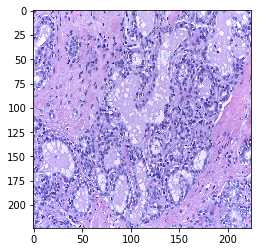

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(X[5], interpolation='nearest')
plt.show()

In [ ]:
target_benign=np.full(len(benign),3)
target_insitu=np.full(len(insitu),2)
target_invasive=np.full(len(invasive),1)
target_normal=np.full(len(normal),0)
Y=np.concatenate([target_benign,target_insitu,target_invasive,target_normal])
Y

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [ ]:
len(Y)

400

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle='true')
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
print('number_of_train:', number_of_train)
print('number_of_test:', number_of_test)

number_of_train: 320
number_of_test: 80


# Ensemble learning

## VGG16

In [ ]:
early_stop=EarlyStopping(patience=4)
reduceLR=ReduceLROnPlateau(patience=4)

In [ ]:
# detect and init the TPU
tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)

# instantiate a distribution strategy
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.17.225.42:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.17.225.42:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
  with tpu_strategy.scope():
      vgg_model = VGG16(weights='imagenet',include_top=False)
      for layers in vgg_model.layers:
          layers.trainable=False
      x=vgg_model.output
      x=GlobalAveragePooling2D()(x)
      x=Dense(128,activation='relu')(x)
      x=Dropout(0.15)(x)
      output=Dense(4,activation='softmax')(x)
      model1=Model(inputs=vgg_model.input,outputs=output)
      model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
from random import shuffle

ind_list = [i for i in range(len(X_train))]
shuffle(ind_list)
X_train_new  = X_train[ind_list, :,:,:]
Y_train_new = Y_train[ind_list]

In [ ]:
# Checkpoint to save best model per epoch
model_filepath = "/content/drive/My Drive/vgg-{epoch:02d}-{val_accuracy:.4f}.hdf5"
model_checkpoint_callbackvgg = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_filepath,
    verbose=1,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
r1=model1.fit(X_train_new,Y_train_new,validation_split=0.2,epochs=20, callbacks=[model_checkpoint_callbackvgg])

Epoch 1/20
8/8 [==============================] - 10s 640ms/step - loss: 4.3007 - accuracy: 0.3203 - val_loss: 2.1327 - val_accuracy: 0.4531

Epoch 00001: val_accuracy improved from -inf to 0.45312, saving model to /content/drive/My Drive/vgg-01-0.4531.hdf5
Epoch 2/20
8/8 [==============================] - 1s 149ms/step - loss: 2.0966 - accuracy: 0.5273 - val_loss: 1.3040 - val_accuracy: 0.6094

Epoch 00002: val_accuracy improved from 0.45312 to 0.60938, saving model to /content/drive/My Drive/vgg-02-0.6094.hdf5
Epoch 3/20
8/8 [==============================] - 1s 125ms/step - loss: 1.4918 - accuracy: 0.6680 - val_loss: 1.4138 - val_accuracy: 0.6562

Epoch 00003: val_accuracy improved from 0.60938 to 0.65625, saving model to /content/drive/My Drive/vgg-03-0.6562.hdf5
Epoch 4/20
8/8 [==============================] - 1s 126ms/step - loss: 0.8888 - accuracy: 0.7344 - val_loss: 1.0977 - val_accuracy: 0.6562

Epoch 00004: val_accuracy did not improve from 0.65625
Epoch 5/20
8/8 [==========

In [ ]:
with tpu_strategy.scope():
  res=tf.keras.applications.ResNet50(weights='imagenet',include_top=False)
  for layers in res.layers:
          layers.trainable=False
  x=res.output
  x=GlobalAveragePooling2D()(x)
  x=Dense(128,activation='relu')(x)
  x=Dropout(0.15)(x)
  output=Dense(4,activation='softmax')(x)
  model2=Model(inputs=res.input,outputs=output)
  model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
model_filepath = "/content/drive/My Drive/res-{epoch:02d}-{val_accuracy:.4f}.hdf5"
model_checkpoint_callbackres = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_filepath,
    verbose=1,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
r2=model2.fit(X_train_new,Y_train_new,validation_split=0.2,epochs=20, callbacks=[model_checkpoint_callbackres])

Epoch 1/20
8/8 [==============================] - 56s 4s/step - loss: 1.6579 - accuracy: 0.3828 - val_loss: 1.1427 - val_accuracy: 0.5156

Epoch 00001: val_accuracy improved from -inf to 0.51562, saving model to /content/drive/My Drive/res-01-0.5156.hdf5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20
8/8 [==============================] - 1s 121ms/step - loss: 1.0195 - accuracy: 0.5469 - val_loss: 1.0044 - val_accuracy: 0.6094

Epoch 00002: val_accuracy improved from 0.51562 to 0.60938, saving model to /content/drive/My Drive/res-02-0.6094.hdf5
Epoch 3/20
8/8 [==============================] - 1s 118ms/step - loss: 0.7578 - accuracy: 0.7188 - val_loss: 1.0132 - val_accuracy: 0.6562

Epoch 00003: val_accuracy improved from 0.60938 to 0.65625, saving model to /content/drive/My Drive/res-03-0.6562.hdf5
Epoch 4/20
8/8 [==============================] - 1s 190ms/step - loss: 0.5773 - accuracy: 0.8125 - val_loss: 0.8584 - val_accuracy: 0.6719

Epoch 00004: val_accuracy improved from 0.65625 to 0.67188, saving model to /content/drive/My Drive/res-04-0.6719.hdf5
Epoch 5/20
8/8 [==============================] - 1s 144ms/step - loss: 0.4576 - accuracy: 0.8438 - val_loss: 0.9132 - val_accuracy: 0.5938

Epoch 00005: val_accuracy did not improve from 0.67188
Epoch 6/20
8/8 [========

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
with tpu_strategy.scope():
  base_model = InceptionV3(
                    input_shape=(image_width, image_height, 3),
                    weights='imagenet',
                    include_top=False)
  # Freeze the first 10 layers
  for layer in base_model.layers[:10]:
      layer.trainable = False
  x = base_model.output
  x = GlobalAveragePooling2D()(x)
  x = Dense(512, activation='relu')(x)
  x = Dropout(0.4)(x)
  predictions = Dense(4, activation='softmax')(x)
  model3 = Model(inputs=base_model.inputs, outputs=predictions)
  model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_filepath = "/content/drive/My Drive/Inception-{epoch:02d}-{val_accuracy:.4f}.hdf5"
model_checkpoint_callbackin = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_filepath,
    verbose=1,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
r3=model3.fit(X_train_new,Y_train_new,validation_split=0.2,epochs=20, callbacks=[model_checkpoint_callbackin])

Epoch 1/20
8/8 [==============================] - 78s 2s/step - loss: 1.8743 - accuracy: 0.2930 - val_loss: 311.3103 - val_accuracy: 0.2344

Epoch 00001: val_accuracy improved from -inf to 0.23438, saving model to /content/drive/My Drive/Inception-01-0.2344.hdf5
Epoch 2/20
8/8 [==============================] - 1s 155ms/step - loss: 1.3048 - accuracy: 0.3711 - val_loss: 12662.6465 - val_accuracy: 0.2344

Epoch 00002: val_accuracy did not improve from 0.23438
Epoch 3/20
8/8 [==============================] - 1s 153ms/step - loss: 1.2374 - accuracy: 0.4609 - val_loss: 3118.5767 - val_accuracy: 0.2344

Epoch 00003: val_accuracy did not improve from 0.23438
Epoch 4/20
8/8 [==============================] - 1s 157ms/step - loss: 1.1092 - accuracy: 0.5117 - val_loss: 695.7341 - val_accuracy: 0.2344

Epoch 00004: val_accuracy did not improve from 0.23438
Epoch 5/20
8/8 [==============================] - 1s 158ms/step - loss: 1.0164 - accuracy: 0.5859 - val_loss: 96.4116 - val_accuracy: 0.2344

In [ ]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average
model_1 = load_model("/content/drive/My Drive/vgg-19-0.7031.hdf5")
model_1 = Model(inputs=model_1.inputs,
                outputs=model_1.outputs,
                name='vgg16')
model_2 = load_model("/content/drive/My Drive/res-20-0.7344.hdf5")
model_2 = Model(inputs=model_2.inputs,
                outputs=model_2.outputs,
                name='resnet50')
model_3 = load_model("/content/drive/My Drive/Inception-19-0.4062.hdf5")
model_3 = Model(inputs=model_3.inputs,
                outputs=model_3.outputs,
                name='inception')
models = [model_1, model_2, model_3]
model_input = Input(shape=(image_width, image_height, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

In [ ]:
 ensemble_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
r4=ensemble_model.fit(X_train_new,Y_train_new,validation_split=0.2,epochs=20)

Epoch 1/20
8/8 [==============================] - 14s 2s/step - loss: 0.1192 - accuracy: 0.9961 - val_loss: 0.8907 - val_accuracy: 0.6875
Epoch 2/20
8/8 [==============================] - 10s 1s/step - loss: 0.1160 - accuracy: 0.9883 - val_loss: 1.0435 - val_accuracy: 0.6406
Epoch 3/20
8/8 [==============================] - 10s 1s/step - loss: 0.1168 - accuracy: 0.9922 - val_loss: 0.7704 - val_accuracy: 0.7812
Epoch 4/20
8/8 [==============================] - 10s 1s/step - loss: 0.0991 - accuracy: 0.9961 - val_loss: 0.8709 - val_accuracy: 0.6562
Epoch 5/20
8/8 [==============================] - 10s 1s/step - loss: 0.0844 - accuracy: 0.9961 - val_loss: 1.0925 - val_accuracy: 0.6719
Epoch 6/20
8/8 [==============================] - 10s 1s/step - loss: 0.1242 - accuracy: 0.9961 - val_loss: 0.9780 - val_accuracy: 0.6406
Epoch 7/20
8/8 [==============================] - 10s 1s/step - loss: 0.1505 - accuracy: 1.0000 - val_loss: 1.2201 - val_accuracy: 0.6562
Epoch 8/20
8/8 [==================